# matplotlib

In [72]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; margin-left:350px; }</style>"))
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option( 'display.notebook_repr_html', False)  # render Series and DataFrame as text, not HTML
pd.set_option( 'display.max_column', 10)    # number of columns
pd.set_option( 'display.max_rows', 10)     # number of rows
pd.set_option( 'display.width', 90)        # number of characters per row

## Library
plotnine's ggplot

In [73]:
import matplotlib
import matplotlib.pyplot as plt

from plydata import define, query, select, group_by, summarize, arrange, head, rename
import plotnine
from plotnine import *

## Sample Data
This chapter uses the sample data generate with below code. The idea is to simulate two categorical-alike feature, and two numeric value feature:

- com is random character between ‘C1’, ‘C2’ and ‘C3’    
- dept is random character between ‘D1’, ‘D2’, ‘D3’, ‘D4’ and ‘D5’  
- grp is random character with randomly generated ‘G1’, ‘G2’  
- value1 represents numeric value, normally distributed at mean 50  
- value2 is numeric value, normally distributed at mean 25  

In [39]:
n = 200
comp = ['C' + i for i in np.random.randint( 1,4, size  = n).astype(str)] # 3x Company
dept = ['D' + i for i in np.random.randint( 1,6, size  = n).astype(str)] # 5x Department
grp =  ['G' + i for i in np.random.randint( 1,3, size  = n).astype(str)] # 2x Groups
value1 = np.random.normal( loc=50 , scale=5 , size = n)
value2 = np.random.normal( loc=20 , scale=3 , size = n)
value3 = np.random.normal( loc=5 , scale=30 , size = n)

mydf = pd.DataFrame({
    'comp':comp, 
    'dept':dept, 
    'grp': grp,
    'value1':value1, 
    'value2':value2,
    'value3':value3 })
mydf.head()

  comp dept grp     value1     value2     value3
0   C3   D3  G2  45.061360  26.114495  16.250960
1   C3   D1  G1  51.580028  18.671071  37.244801
2   C1   D2  G2  49.646541  25.038363  56.076030
3   C3   D2  G1  46.476886  22.914085  34.586956
4   C3   D5  G2  49.718221  21.499529  18.645477

In [40]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
comp      200 non-null object
dept      200 non-null object
grp       200 non-null object
value1    200 non-null float64
value2    200 non-null float64
value3    200 non-null float64
dtypes: float64(3), object(3)
memory usage: 9.5+ KB


In [78]:
# Sample Data
x = np.linspace(0,5,10)
y = x ** 2

Text(0.5,1,'My Good Data')

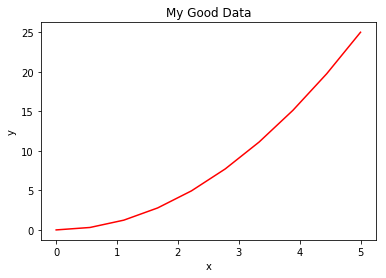

In [88]:
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'red')
plt.title('My Good Data')

## Grid Manager

### matplotlib.pyplot.subplot

#### Manual Plotting

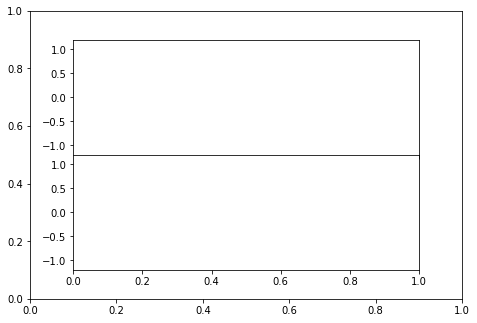

In [41]:
fig = plt.figure()
fig.add_axes([0,0,1,1])
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))


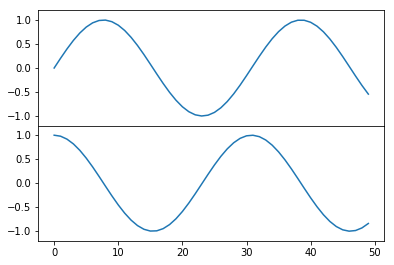

In [42]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

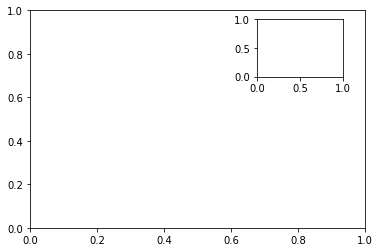

In [43]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

#### Create Subplot Individually
Each call lto **subplot()** will create a new container for subsequent plot command 

Text(0.5,0.5,'eight')

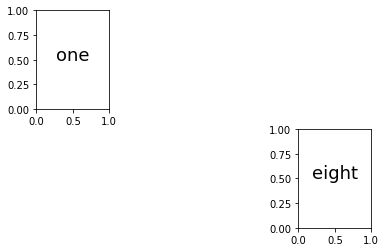

In [44]:
plt.subplot(2,4,1)
plt.text(0.5, 0.5, 'one',fontsize=18, ha='center')

plt.subplot(2,4,8)
plt.text(0.5, 0.5, 'eight',fontsize=18, ha='center')

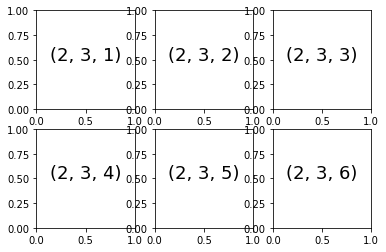

In [45]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

#### Create Subplots Upfront
**subplots()** returns two variables:  
- fig : reference to the entire container  
- ax  : reference to individual plot. It is an array

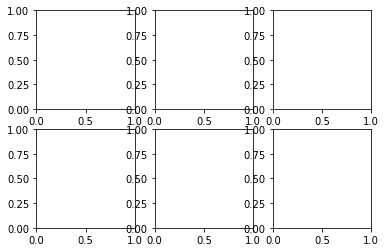

In [46]:
fig, ax = plt.subplots(2, 3) # individual axes

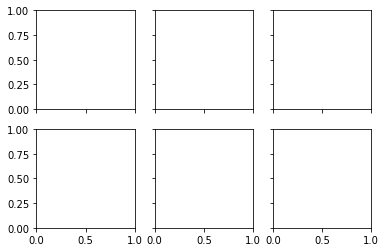

In [47]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row') # removed inner label

**Iterate through subplots (ax) to populate them**

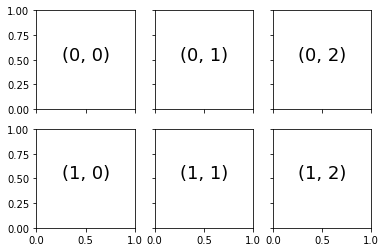

In [48]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

#### Complicated Arrangement

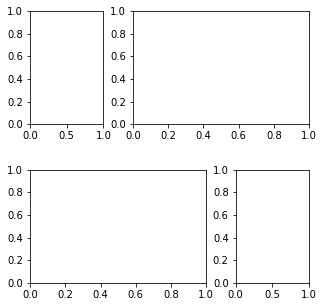

In [49]:
plt.figure(figsize=(5,5))
grid = plt.GridSpec(2, 3, hspace=0.4, wspace=0.4)
plt.subplot(grid[0, 0])  #row 0, col 0
plt.subplot(grid[0, 1:]) #row 0, col 1 to :
plt.subplot(grid[1, :2]) #row 1, col 0:2 
plt.subplot(grid[1, 2])  #ro2 1, col 2

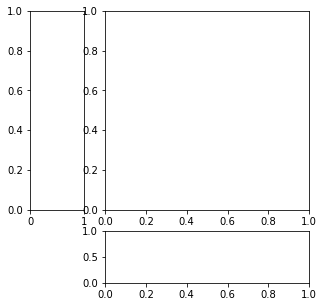

In [50]:
plt.figure(figsize=(5,5))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)
plt.subplot(grid[:3, 0])    # row 0:3, col 0
plt.subplot(grid[:3, 1: ])  # row 0:3, col 1:
plt.subplot(grid[3, 1: ]);   # row 3,   col 1:

**-1 means last row or column**

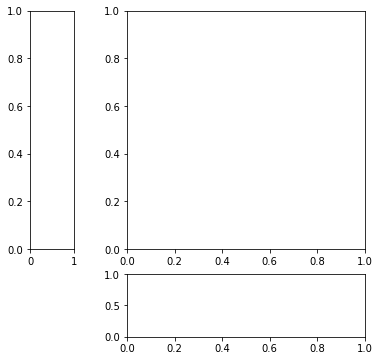

In [51]:
plt.figure(figsize=(6,6))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=1.2)
plt.subplot(grid[:-1, 0 ])  # row 0 till last row (not including last row), col 0
plt.subplot(grid[:-1, 1:])  # row 0 till last row (not including last row), col 1 till end
plt.subplot(grid[-1, 1: ]); # row last row, col 1 till end

## Histogram

### 1xNumeric

#### Using matplotlib

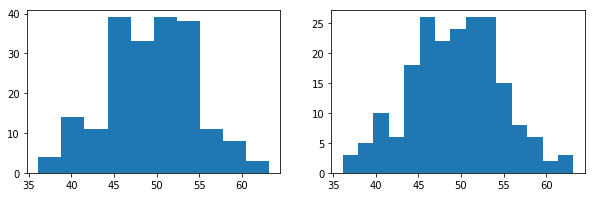

In [52]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.hist(mydf.value1);  # default 10 bins

plt.subplot(1,2,2)
plt.hist(mydf.value1, bins=15);

#### Using Plotnine
```
plotnine.ggplot( dataframe, aex(x='colName')) + geom_histogram( bins=10 )
plotnine.ggplot( dataframe, aex(x='colName')) + geom_histogram( binwidth=? )
```

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 12'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


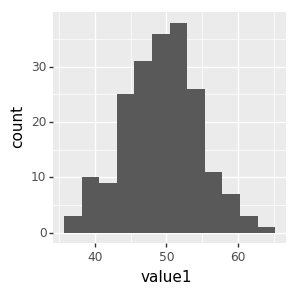

<ggplot: (-9223371871397748259)>

In [53]:
plotnine.options.figure_size = (3, 3)
ggplot(mydf, aes(x='value1')) + geom_histogram()  # default bins = 10

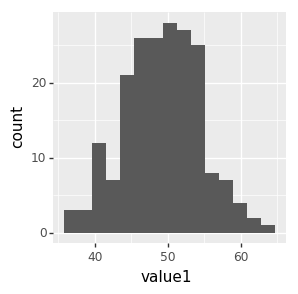

<ggplot: (165456913963)>

In [54]:
ggplot(mydf, aes(x='value1')) + geom_histogram(bins = 15)

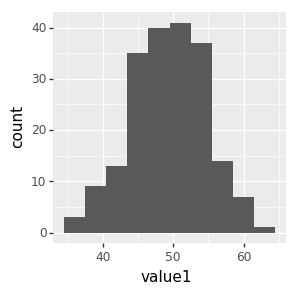

<ggplot: (165455117632)>

In [55]:
ggplot(mydf, aes(x='value1')) + geom_histogram(binwidth = 3)

### 1xNumeric + 1xCategorical

```
plotnine.ggplot( dataframe, 
                    aes(x='colName'), 
                    fill='categorical-alike-colName') 
+ geom_histogram()
```

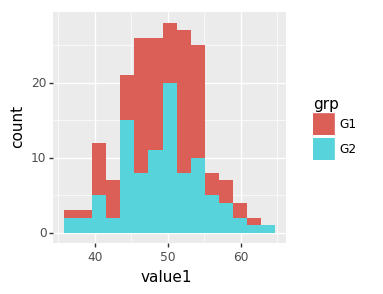

<ggplot: (-9223371871398245923)>

In [56]:
ggplot(mydf, aes(x='value1', fill='grp')) + geom_histogram(bins=15)

## Scatter Plot

### 2x Numeric

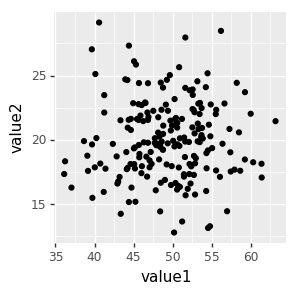

<ggplot: (-9223371871400296462)>

In [57]:
ggplot(mydf, aes(x='value1',y='value2')) + geom_point()

### 2x Numeric + 1x Categorical
```
ggplot( DataFrame, aes(x='colName1',y='colName2')) 
    + geom_point( aes(
        color='categorical-alike-colName',
        size='numberColName'
    ))
```

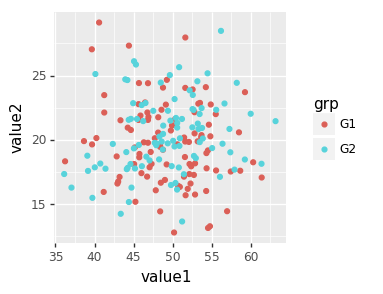

<ggplot: (-9223371871399930031)>

In [58]:
ggplot(mydf, aes(x='value1',y='value2')) + geom_point(aes(color='grp'))

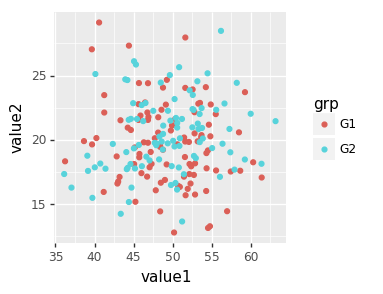

<ggplot: (-9223371871399573609)>

In [59]:
ggplot(mydf, aes(x='value1',y='value2',color='grp')) + geom_point()

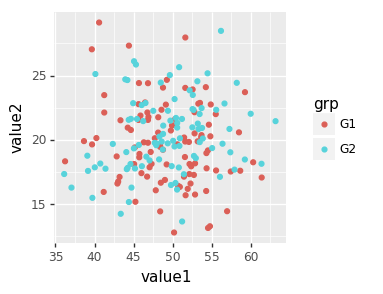

<ggplot: (165454895529)>

In [60]:
ggplot(mydf, aes(x='value1',y='value2')) + \
    geom_point(aes(
        color='grp'
    ))

### 2x Numeric + 1x Numeric + 1x Categorical

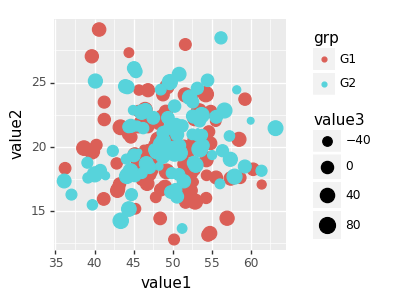

<ggplot: (165454902385)>

In [61]:
ggplot(mydf, aes(x='value1',y='value2')) + \
    geom_point(aes( 
        color='grp', size='value3'
    ))

### Overlay Smooth Line

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


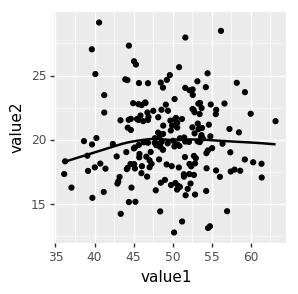

<ggplot: (-9223371871398237475)>

In [62]:
ggplot(mydf, aes(x='value1', y='value2')) + \
    geom_point() + \
    geom_smooth()          # default method='loess'

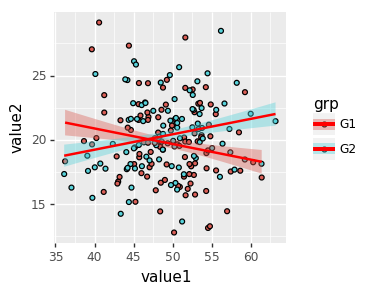

<ggplot: (165456545565)>

In [63]:
ggplot(mydf, aes(x='value1', y='value2',fill='grp')) + \
    geom_point() + \
    geom_smooth(
        se=True,
        color='red',
        method='lm', 
        level=0.75)

## Line Chart

### 2x Numeric Data

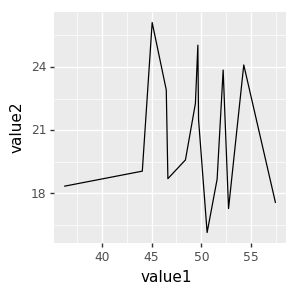

<ggplot: (165457061419)>

In [64]:
ggplot (mydf.head(15), aes(x='value1', y='value2')) + geom_line()

### 1x Numeric, 1x Categorical

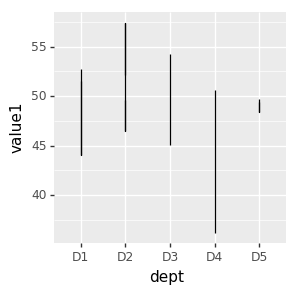

<ggplot: (-9223371871399905262)>

In [65]:
ggplot (mydf.head(15), aes(x='dept', y='value1')) + geom_line()

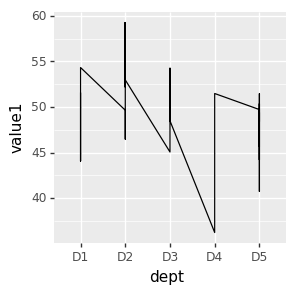

<ggplot: (165455002127)>

In [66]:
ggplot (mydf.head(30), aes(x='dept', y='value1')) + geom_line( aes(group=1))

### 2x Numeric, 1x Categorical

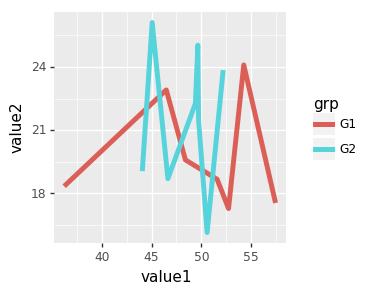

<ggplot: (165456432830)>

In [67]:
ggplot (mydf.head(15), aes(x='value1', y='value2')) + geom_line( aes(color='grp'),size=2)

## Bar Chart

#### 1x Categorical
Single categorical variable produces frequency chart.

In [68]:
tmpdf = mydf.groupby(['comp'],as_index=False).count()
tmpdf

  comp  dept  grp  value1  value2  value3
0   C1    65   65      65      65      65
1   C2    68   68      68      68      68
2   C3    67   67      67      67      67

In [69]:
tmpdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 6 columns):
comp      3 non-null object
dept      3 non-null int64
grp       3 non-null int64
value1    3 non-null int64
value2    3 non-null int64
value3    3 non-null int64
dtypes: int64(5), object(1)
memory usage: 168.0+ bytes


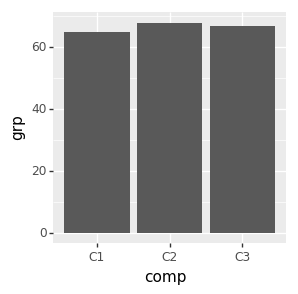

<ggplot: (165454858069)>

In [70]:
ggplot (tmpdf, aes(x='comp', y='grp')) +geom_col()